# 주제 : <br>우리 애는 머리는 좋은데, 공부를 안해서 그래요 - 데이터로 살펴보는 우리 아이 학습 성공/실패 요소
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
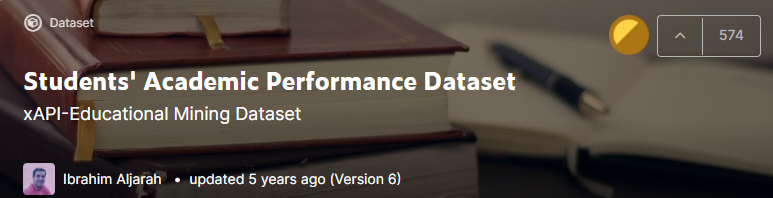
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data

    
## 데이터 소개
    - 이번 주제는 xAPI-Edu-Data 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    xAPI-Edu-Data.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 강좌 콘텐츠를 방문한 횟수
    Viewingannouncements:공지사항을 확인한 횟 수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
        
    
    
## 최종 목표
    - 연구용 Tabular 데이터의 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 분류 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득
---

## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Colab Notebook에 Kaggle API 세팅하기


In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'dukpyoyang'
os.environ['KAGGLE_KEY'] = '78382321d680a2ba463b3802443f248b'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d aljarah/xAPI-Edu-Data
!unzip '*.zip'

Dataset URL: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data
License(s): CC-BY-SA-4.0
  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 1.93MB/s]
Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('/content/xAPI-Edu-Data.csv')

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
df['gender'].value_counts()

,count
gender,
M,305
F,175


In [ ]:
df['NationalITy'].value_counts()

,count
NationalITy,
KW,179
Jordan,172
Palestine,28
Iraq,22
lebanon,17
Tunis,12
SaudiArabia,11
Egypt,9
Syria,7


In [ ]:
df['PlaceofBirth'].value_counts()

,count
PlaceofBirth,
KuwaIT,180
Jordan,176
Iraq,22
lebanon,19
SaudiArabia,16
USA,16
Palestine,10
Egypt,9
Tunis,9


In [ ]:
df['StageID'].value_counts()

,count
StageID,
MiddleSchool,248
lowerlevel,199
HighSchool,33


In [ ]:
df['GradeID'].value_counts()

,count
GradeID,
G-02,147
G-08,116
G-07,101
G-04,48
G-06,32
G-11,13
G-12,11
G-09,5
G-10,4


In [ ]:
df['SectionID'].value_counts()

,count
SectionID,
A,283
B,167
C,30


In [ ]:
df['Topic'].value_counts()

,count
Topic,
IT,95
French,65
Arabic,59
Science,51
English,45
Biology,30
Spanish,25
Chemistry,24
Geology,24


### 수치형 데이터의 히스토그램 그리기


In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

<Axes: xlabel='raisedhands', ylabel='Count'>

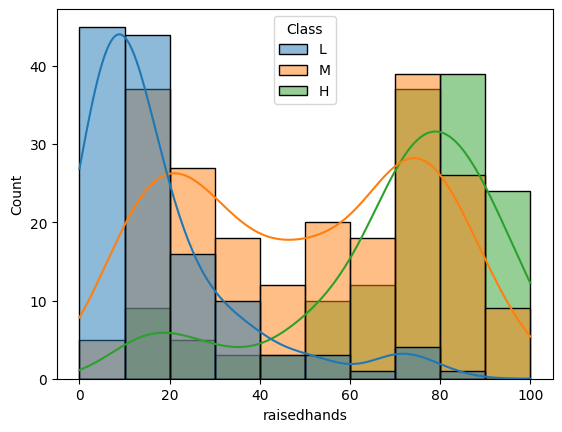

In [ ]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
#
sns.histplot(x='raisedhands', data=df, hue='Class',hue_order=['L', 'M', 'H'], kde=True)

<Axes: xlabel='VisITedResources', ylabel='Count'>

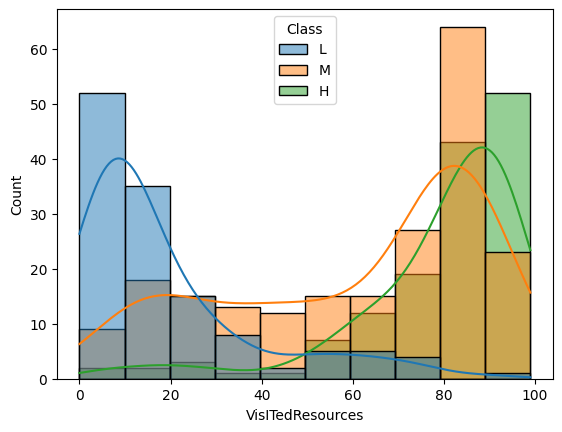

In [ ]:
sns.histplot(x='VisITedResources', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

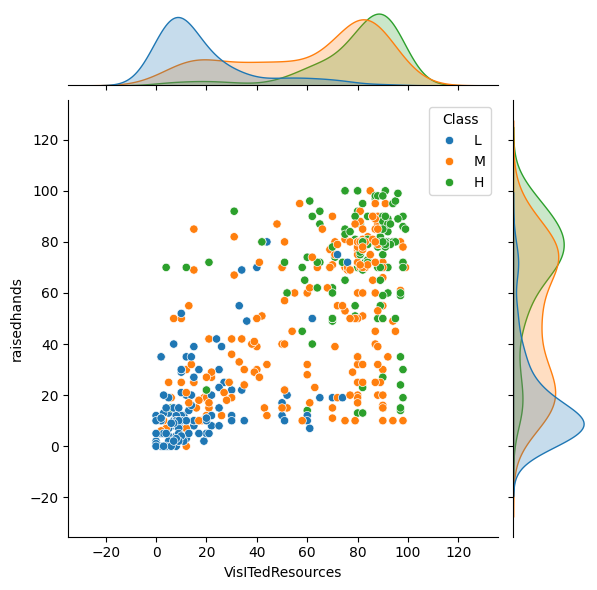

In [ ]:
sns.jointplot(x='VisITedResources', y='raisedhands',
              data=df, hue='Class', hue_order=['L', 'M', 'H'])

<Axes: xlabel='AnnouncementsView', ylabel='Count'>

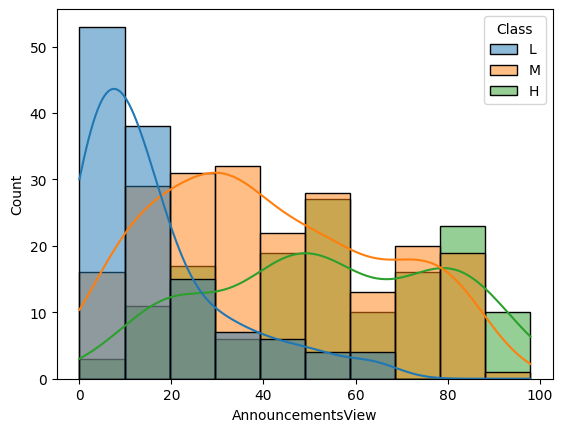

In [ ]:
sns.histplot(x='AnnouncementsView', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

<Axes: xlabel='Discussion', ylabel='Count'>

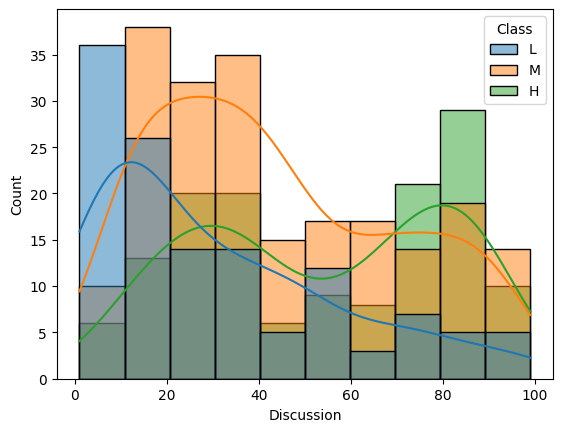

In [ ]:
sns.histplot(x='Discussion', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)

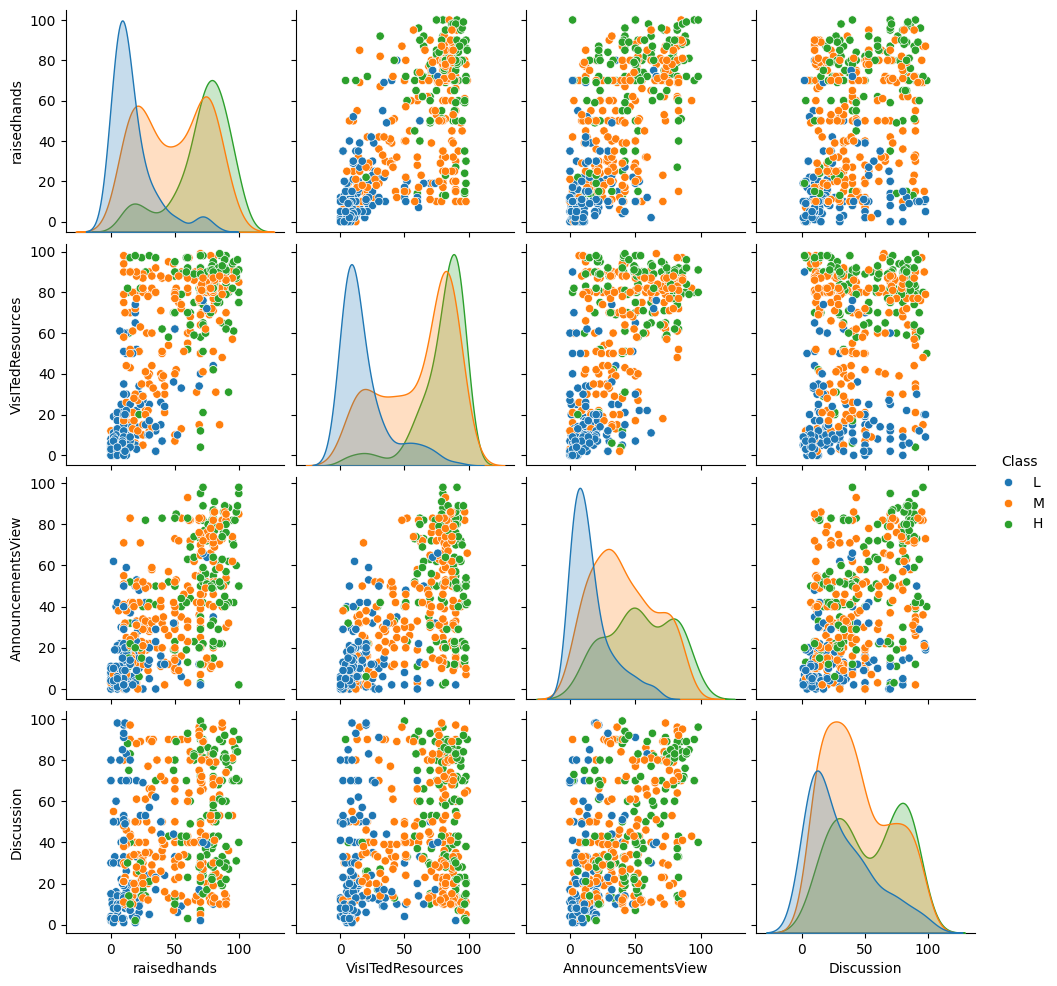

In [ ]:
sns.pairplot(df, hue='Class', hue_order=['L', 'M', 'H'])

### Countplot을 이용하여 범주별 통계 확인하기


<ipython-input-23-ffcf25ca7754>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, order=['L', 'M', 'H'], palette= 'Set2', legend = True)


<Axes: xlabel='Class', ylabel='count'>

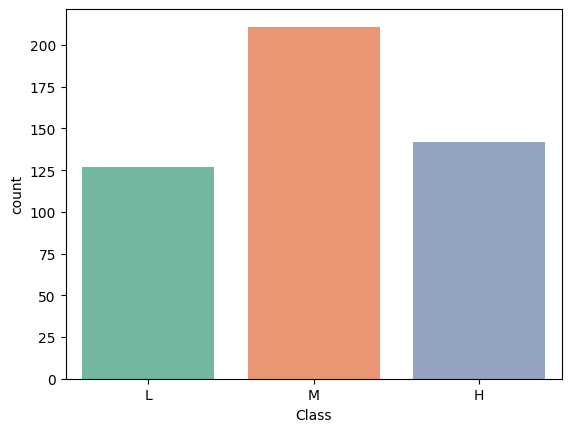

In [ ]:
# seaborn의 countplot()을 사용
# Hint) x와 hue를 사용하여 범주별 Class 통계 확인

sns.countplot(x='Class', data=df, order=['L', 'M', 'H'], palette= 'Set2', legend = True)

<Axes: xlabel='gender', ylabel='count'>

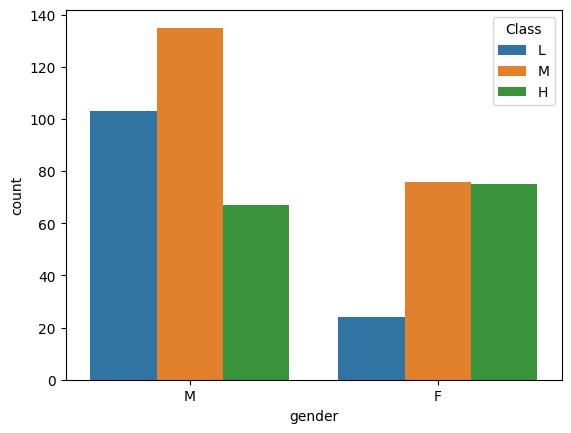

In [ ]:
sns.countplot(x='gender', data=df, hue='Class', hue_order=['L', 'M', 'H'])

In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

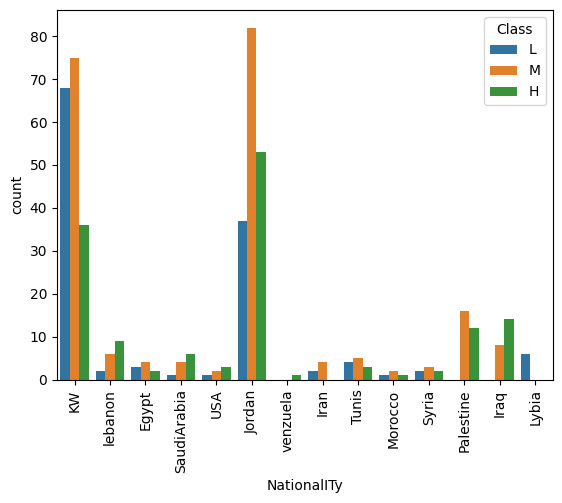

In [ ]:
sns.countplot(x='NationalITy', data=df, hue='Class', hue_order=['L', 'M', 'H'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='ParentAnsweringSurvey', ylabel='count'>

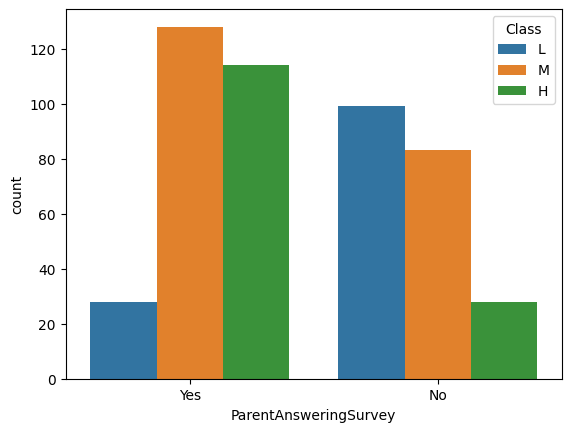

In [ ]:
sns.countplot(x='ParentAnsweringSurvey', data=df, hue='Class', hue_order=['L', 'M', 'H'])

<Axes: xlabel='ParentschoolSatisfaction', ylabel='count'>

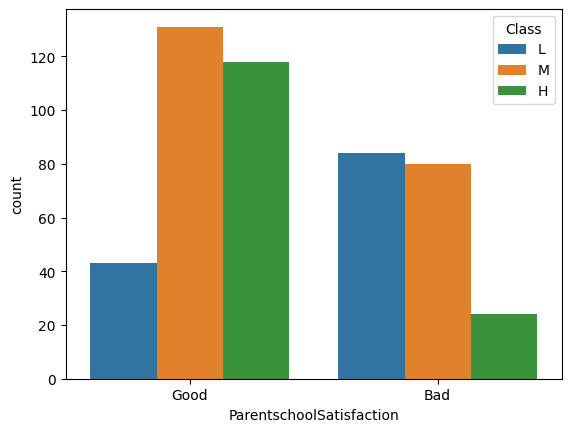

In [ ]:
sns.countplot(x='ParentschoolSatisfaction', data=df, hue='Class', hue_order=['L', 'M', 'H'])

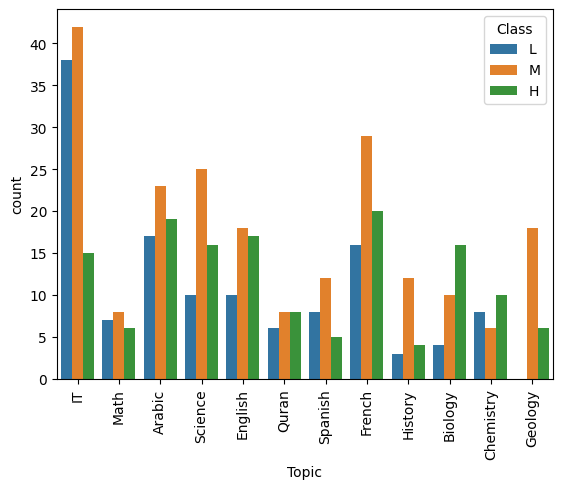

In [ ]:
sns.countplot(x='Topic', data=df, hue='Class', hue_order=['L', 'M', 'H'])
plt.xticks(rotation=90)
plt.show()

### 범주형 대상 Class 컬럼을 수치로 바꾸어 표현하기

In [ ]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)
# Hint) DataFrame의 map() 메소드를 사용

df['Class_value'] = df['Class'].map(dict(L=-1, M=0, H=1))
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


In [ ]:
df.groupby('gender').mean(numeric_only=True)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class_value
gender,,,,,
F,52.862857,64.000000,39.748571,47.828571,0.291429
M,43.281967,49.518033,36.868852,40.675410,-0.118033


<BarContainer object of 2 artists>

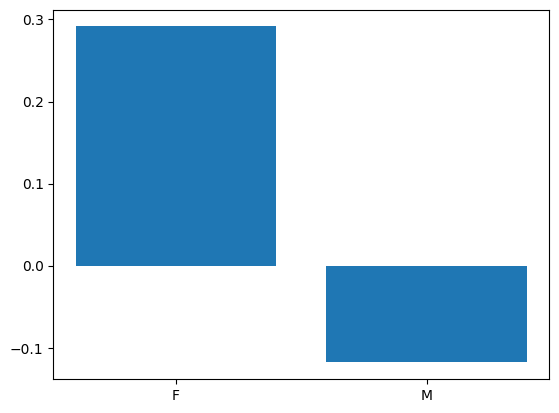

In [ ]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
gb = df.groupby('gender').mean(numeric_only=True)['Class_value']
plt.bar(gb.index, gb)

<BarContainer object of 12 artists>

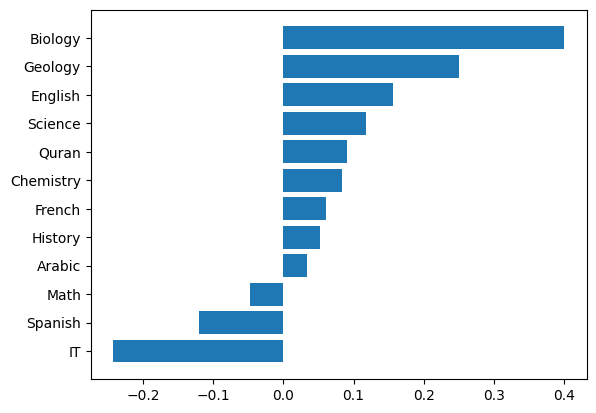

In [ ]:
gb = df.groupby('Topic').mean(numeric_only=True)['Class_value'].sort_values()
plt.barh(gb.index, gb)

<BarContainer object of 2 artists>

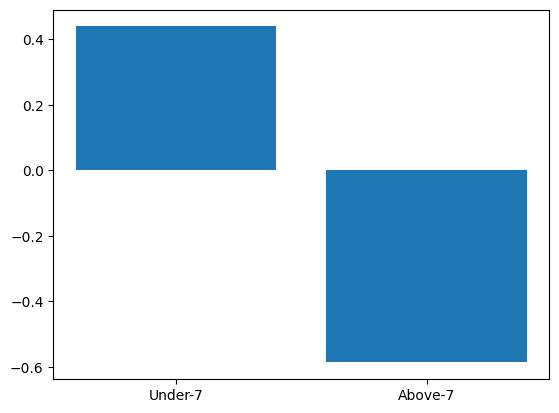

In [ ]:
gb = df.groupby('StudentAbsenceDays').mean(numeric_only=True)['Class_value'].sort_values(ascending=False)
plt.bar(gb.index, gb)

## Step 3. 모델 학습을 위한 데이터 전처리


### get_dummies()를 이용하여 범주형 데이터 전처리하기


In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [ ]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# Hint) Multicollinearity를 피하기 위해 drop_first=True로 설정

X = pd.get_dummies(df.drop(['ParentschoolSatisfaction', 'Class', 'Class_value'], axis=1),
                   columns=['gender', 'NationalITy', 'PlaceofBirth',
                            'StageID', 'GradeID','SectionID', 'Topic',
                            'Semester', 'Relation', 'ParentAnsweringSurvey',
                            'StudentAbsenceDays'],
                   drop_first=True)
y = df['Class'].map(dict(L=1, M=2, H=0))

In [ ]:
X.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,True
1,20,20,3,25,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,True
2,10,7,0,30,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,30,25,5,35,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
4,40,50,12,50,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
X.columns

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'gender_M', 'NationalITy_Iran', 'NationalITy_Iraq',
       'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia',
       'NationalITy_Morocco', 'NationalITy_Palestine',
       'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis',
       'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela',
       'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan',
       'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco',
       'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia',
       'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA',
       'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'StageID_MiddleSchool',
       'StageID_lowerlevel', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06',
       'GradeID_G-07', 'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10',
       'GradeID_G-11', 'GradeID_G-12', 'SectionID_B', 'SectionID_C',
       'Topic_B

In [ ]:
y.head()

,Class
0,2
1,2
2,1
3,1
4,2


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

### 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기


#### KNeighbors Classifier 모델 생성/학습하기


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 모델 생성/학습
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

parameters = {'n_neighbors':[3,5,7,9]}
knn_grid= GridSearchCV(knn, param_grid=parameters, cv=3, refit=True)

knn_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [ ]:
scores_df = pd.DataFrame(knn_grid.cv_results_)
scores_df[['params', 'mean_test_score',
           'rank_test_score','split0_test_score',
           'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'n_neighbors': 3},0.544643,4,0.571429,0.517857,0.544643
1,{'n_neighbors': 5},0.550595,3,0.616071,0.500000,0.535714
2,{'n_neighbors': 7},0.565476,1,0.598214,0.544643,0.553571
3,{'n_neighbors': 9},0.556548,2,0.598214,0.535714,0.535714


#### Support Vector Machines Classifier 모델 생성/학습하기


In [ ]:
from sklearn import svm

In [ ]:
# 모형 객체 생성 (기본값 kernel='rbf' 적용)
svm_model = svm.SVC()
# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)

SVC()

### 모델 학습 결과 평가하기


#### KNeighbors Classifier 모델 평가

In [ ]:
pred = knn.predict(X_test)

In [ ]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, pred)
knn_matrix

array([[21,  5, 29],
       [ 4, 19, 10],
       [15, 11, 30]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           H       0.53      0.38      0.44        55
           L       0.54      0.58      0.56        33
           M       0.43      0.54      0.48        56

    accuracy                           0.49       144
   macro avg       0.50      0.50      0.49       144
weighted avg       0.49      0.49      0.48       144



In [ ]:
# 인접한 k개의 sample에 대해 거리와 index를 반환
knn.kneighbors()

(array([[6.2474616 , 6.46701742, 7.641541  , ..., 9.77634964, 9.88909346,
         9.89839057],
        [2.16493599, 2.18153123, 2.28439473, ..., 3.0155032 , 3.11946695,
         3.509809  ],
        [2.53888197, 3.06943449, 4.4060989 , ..., 5.65446446, 5.73755222,
         6.3343916 ],
        ...,
        [2.06790645, 2.55677161, 3.52687213, ..., 4.56457914, 5.25958048,
         5.76186648],
        [2.34497349, 3.53791181, 3.93173932, ..., 5.07103776, 5.28571403,
         5.43675956],
        [3.84148889, 4.1377166 , 4.43704271, ..., 4.73131539, 4.7391323 ,
         4.8792303 ]]),
 array([[162, 303, 126, ...,  79,  76, 321],
        [144,   3, 195, ..., 230, 176, 253],
        [153, 292,  35, ...,  20, 136, 267],
        ...,
        [ 30, 314,  91, ..., 168,  87, 310],
        [240, 213, 149, ...,  64, 160, 275],
        [ 62, 215, 297, ..., 275,  63, 266]]))

#### Support Vector Machines Classifier 모델 평가

In [ ]:
svm_pred = svm_model.predict(X_test)

In [ ]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, svm_pred)
svm_matrix

array([[25,  0, 30],
       [ 0, 29,  4],
       [ 6,  8, 42]])

In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           H       0.81      0.45      0.58        55
           L       0.78      0.88      0.83        33
           M       0.55      0.75      0.64        56

    accuracy                           0.67       144
   macro avg       0.71      0.69      0.68       144
weighted avg       0.70      0.67      0.66       144



### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(max_depth = 6)

# DecisionTreeClassifer 학습.
dt_clf.fit(X_train , y_train)

dt_pred = dt_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

[[38  1 16]
 [ 1 28  4]
 [12  7 37]]
              precision    recall  f1-score   support

           H       0.75      0.69      0.72        55
           L       0.78      0.85      0.81        33
           M       0.65      0.66      0.65        56

    accuracy                           0.72       144
   macro avg       0.72      0.73      0.73       144
weighted avg       0.72      0.72      0.71       144



In [ ]:
dt_clf.feature_importances_

array([0.10092009, 0.360061  , 0.040565  , 0.05644157, 0.0235706 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00983611, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03596187, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01092268, 0.        , 0.        , 0.        , 0.        ,
       0.01189366, 0.        , 0.00783396, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01063769,
       0.01340019, 0.02772696, 0.        , 0.01472549, 0.        ,
       0.        , 0.06089644, 0.02844964, 0.18615702])

Feature importances:
[0.101 0.36  0.041 0.056 0.024 0.    0.    0.    0.    0.    0.    0.
 0.01  0.    0.    0.    0.    0.    0.    0.    0.036 0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.011
 0.    0.    0.    0.    0.012 0.    0.008 0.    0.    0.    0.    0.
 0.    0.011 0.013 0.028 0.    0.015 0.    0.    0.061 0.028 0.186]
raisedhands : 0.101
VisITedResources : 0.360
AnnouncementsView : 0.041
Discussion : 0.056
gender_M : 0.024
NationalITy_Iran : 0.000
NationalITy_Iraq : 0.000
NationalITy_Jordan : 0.000
NationalITy_KW : 0.000
NationalITy_Lybia : 0.000
NationalITy_Morocco : 0.000
NationalITy_Palestine : 0.000
NationalITy_SaudiArabia : 0.010
NationalITy_Syria : 0.000
NationalITy_Tunis : 0.000
NationalITy_USA : 0.000
NationalITy_lebanon : 0.000
NationalITy_venzuela : 0.000
PlaceofBirth_Iran : 0.000
PlaceofBirth_Iraq : 0.000
PlaceofBirth_Jordan : 0.036
PlaceofBirth_KuwaIT : 0.000
PlaceofBirth_Lybia : 0.000
PlaceofBirth_Morocco : 0.000
PlaceofB

<ipython-input-86-47aa0fbd0329>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dt_clf.feature_importances_ , y=X.columns , palette = 'pastel')


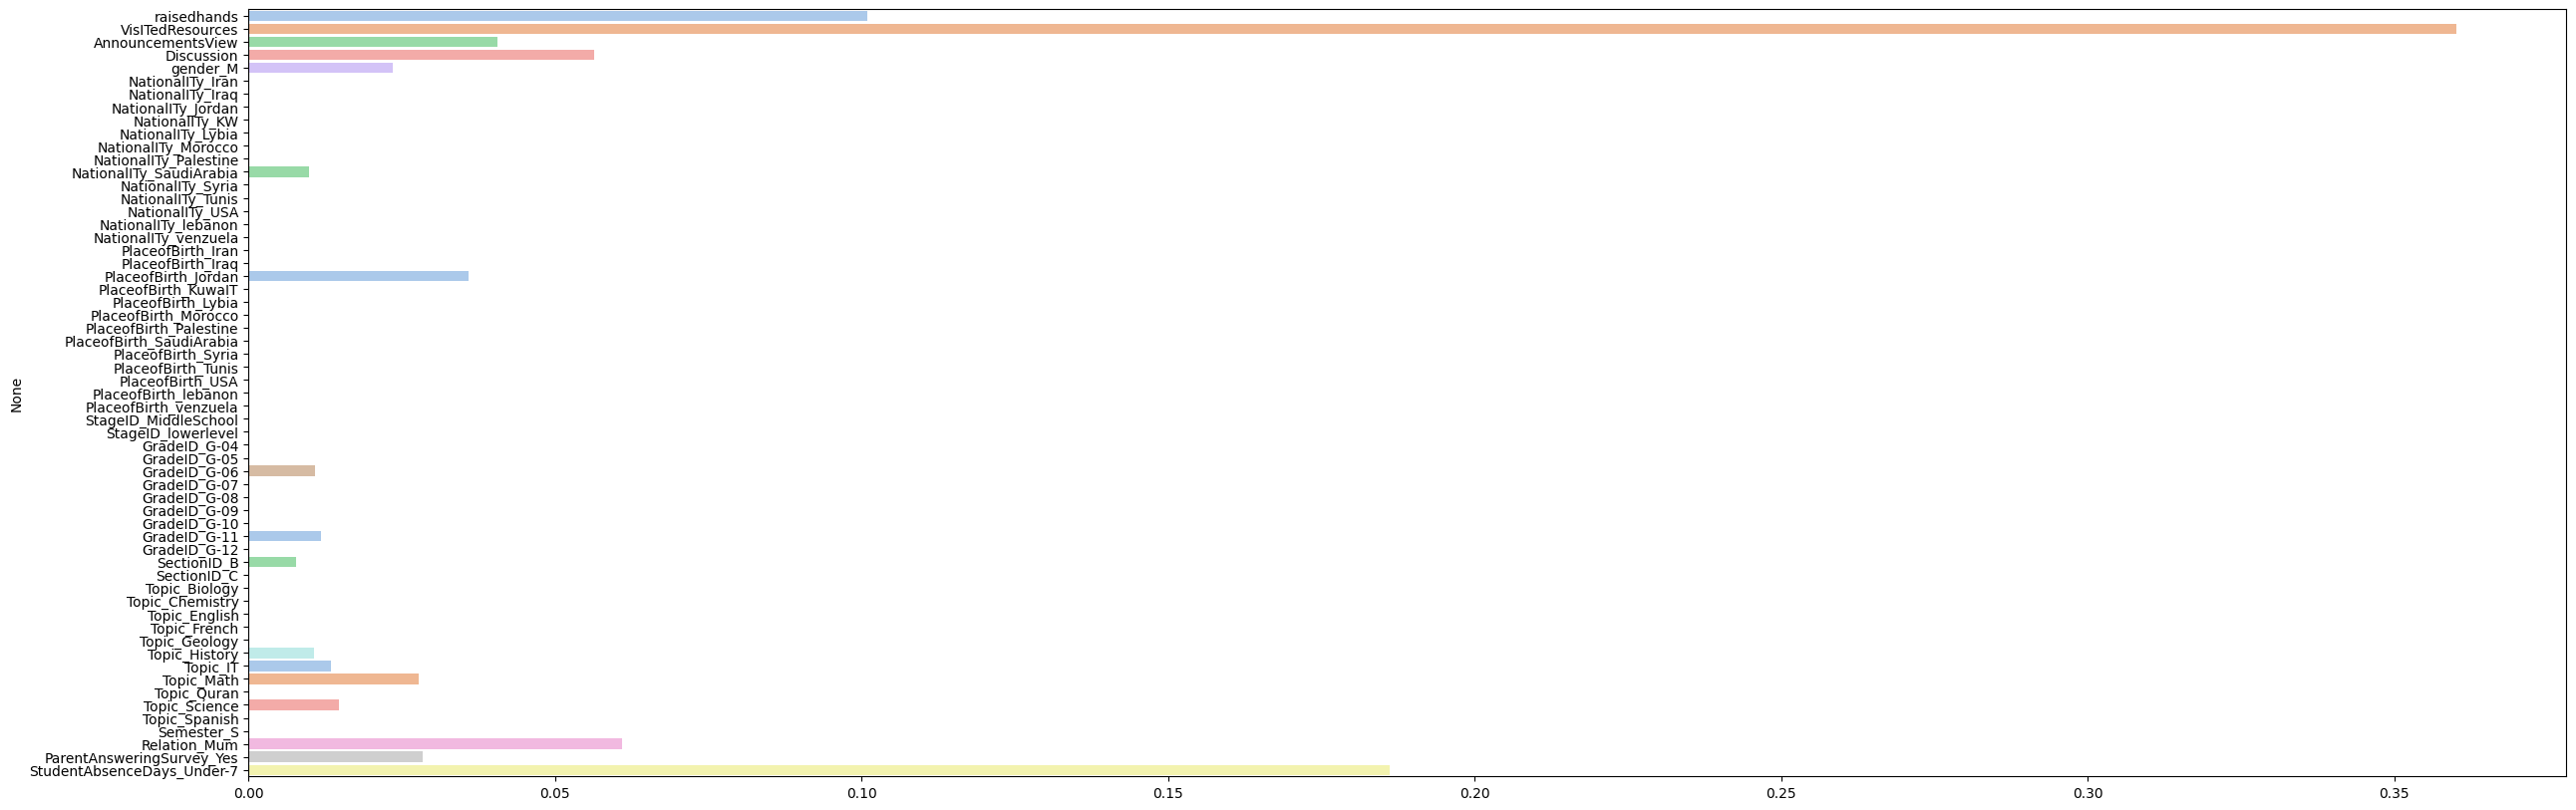

In [ ]:
# feature별 importance 매핑
for name, value in zip(X.columns , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
plt.subplots(figsize=(30, 10))
sns.barplot(x=dt_clf.feature_importances_ , y=X.columns , palette = 'pastel')
plt.show()

## 인공신경망(Tensorflow)

In [ ]:
# train_test_split() 함수로 학습 데이터와 검증 데이터 분리하기
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
print(f'X_train shape: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test: {y_test.shape}')
print(f'X_val shape: {X_val.shape}, y_val: {y_val.shape}')

X_train shape: (268, 59), y_train: (268,)
X_test shape: (144, 59), y_test: (144,)
X_val shape: (68, 59), y_val: (68,)


In [ ]:
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
print(f'X_train shape: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test: {y_test.shape}')
print(f'X_val shape: {X_val.shape}, y_val: {y_val.shape}')

X_train shape: (268, 59), y_train: (268, 3)
X_test shape: (144, 59), y_test: (144, 3)
X_val shape: (68, 59), y_val: (68, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(128,input_shape = (X_train.shape[1], ), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
model.add(Dense(3, activation = 'softmax')) # 10개의 출력을 가지는 신경망

model.compile(optimizer='adam', # 옵티마이저 : Adam
              loss = 'categorical_crossentropy', # 손실 함수 : categorical_crossentropy
              metrics=['acc']) # 모니터링 할 평가지표 : acc

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train,
                    epochs = 300,
                    batch_size = 128,
                    validation_data = (X_val, y_val))

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - acc: 0.3672 - loss: 1.1245 - val_acc: 0.4412 - val_loss: 1.0489
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.4636 - loss: 1.0484 - val_acc: 0.5147 - val_loss: 1.0036
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.5008 - loss: 0.9938 - val_acc: 0.5588 - val_loss: 0.9657
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.5447 - loss: 0.9485 - val_acc: 0.5735 - val_loss: 0.9341
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.5733 - loss: 0.9242 - val_acc: 0.5588 - val_loss: 0.9076
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.6279 - loss: 0.8794 - val_acc: 0.5735 - val_loss: 0.8858
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.6298 - loss: 0.8570 - val_acc: 0.5735 - val_loss: 0.8670
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.6412 - loss: 0.8310 - val_acc: 0.6176 - val_loss: 0.8495
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.6748 - loss:

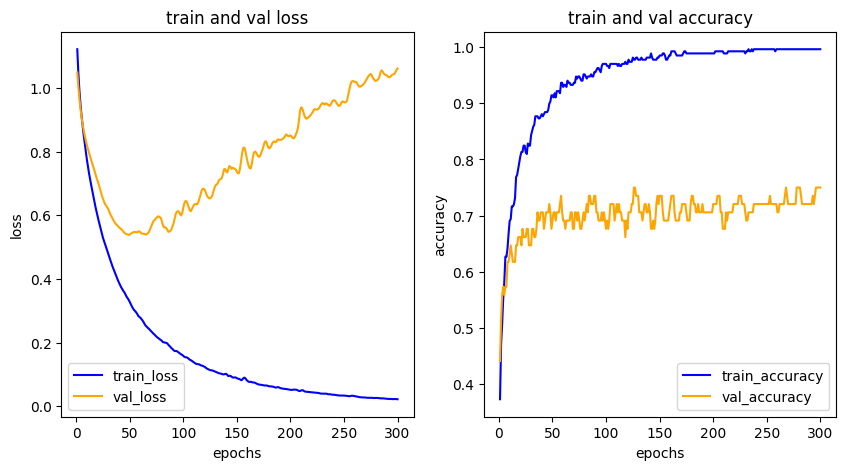

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_accuracy')
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7648 - loss: 1.0296 


[1.1250709295272827, 0.75]

In [ ]:
import numpy as np
np.set_printoptions(precision=7) # numpy 소수점 제한

results = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


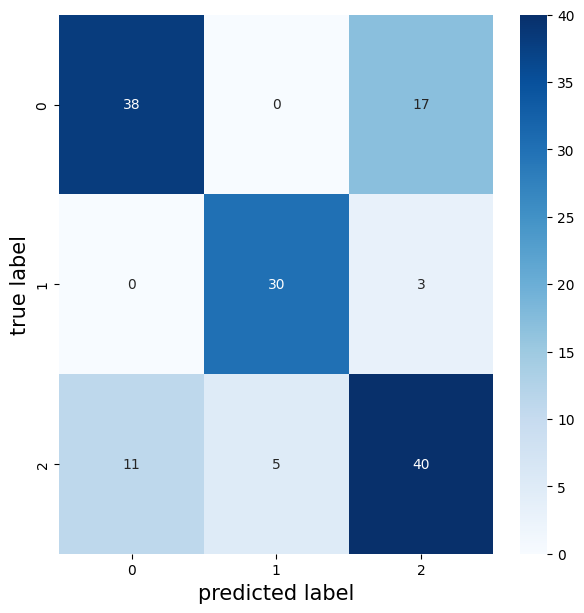

In [ ]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1),
                      np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()

In [ ]:
print('\n', classification_report(np.argmax(y_test, axis = -1),
                                  np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.78      0.69      0.73        55
           1       0.86      0.91      0.88        33
           2       0.67      0.71      0.69        56

    accuracy                           0.75       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.75      0.75      0.75       144

